In [1]:
import numpy as np
import pandas as pd
import re
import csv

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

In [2]:
stig_introductions = []
with open('drive/MyDrive/LinkedIn_Articles/Stig Introductions/stig-introductions.txt', 'r') as f:
  lines = f.readlines()

In [3]:
lines[:5]

['Some say he can play guitar with the clutch...and his carbon fibre beard is chizelled in the most streamlined way...\n',
 'Some say that all his pot plants are called steve.. and that he has a life size tattoo of his face.. on his face..\n',
 'Some say he’s actually dead... But the Grim reaper, is too scared to tell him...\n',
 'Some say He’s contracted every STD known to man, and that he has inflatable breasts to get him out of speeding tickets. All we know.. is\n',
 'Some say he nighted the queen....and that he saved the Queen from God....\n']

In [4]:
def clean(line):
  # Special characters
  line = re.sub(r"\n", "", line)
  # Contractions
  line = re.sub(r"he's", "he is", line)
  line = re.sub(r"there's", "there is", line)
  line = re.sub(r"We're", "We are", line)
  line = re.sub(r"That's", "That is", line)
  line = re.sub(r"won't", "will not", line)
  line = re.sub(r"they're", "they are", line)
  line = re.sub(r"Can't", "Cannot", line)
  line = re.sub(r"wasn't", "was not", line)
  line = re.sub(r"aren't", "are not", line)
  line = re.sub(r"isn't", "is not", line)
  line = re.sub(r"What's", "What is", line)
  line = re.sub(r"haven't", "have not", line)
  line = re.sub(r"hasn't", "has not", line)
  line = re.sub(r"There's", "There is", line)
  line = re.sub(r"He's", "He is", line)
  line = re.sub(r"It's", "It is", line)
  line = re.sub(r"You're", "You are", line)
  line = re.sub(r"I'M", "I am", line)
  line = re.sub(r"shouldn't", "should not", line)
  line = re.sub(r"wouldn't", "would not", line)
  line = re.sub(r"i'm", "I am", line)
  line = re.sub(r"I'm", "I am", line)
  line = re.sub(r"Isn't", "is not", line)
  line = re.sub(r"Here's", "Here is", line)
  line = re.sub(r"you've", "you have", line)
  line = re.sub(r"we're", "we are", line)
  line = re.sub(r"what's", "what is", line)
  line = re.sub(r"couldn't", "could not", line)
  line = re.sub(r"we've", "we have", line)
  line = re.sub(r"who's", "who is", line)
  line = re.sub(r"y'all", "you all", line)
  line = re.sub(r"would've", "would have", line)
  line = re.sub(r"it'll", "it will", line)
  line = re.sub(r"we'll", "we will", line)
  line = re.sub(r"We've", "We have", line)
  line = re.sub(r"he'll", "he will", line)
  line = re.sub(r"Y'all", "You all", line)
  line = re.sub(r"Weren't", "Were not", line)
  line = re.sub(r"Didn't", "Did not", line)
  line = re.sub(r"they'll", "they will", line)
  line = re.sub(r"they'd", "they would", line)
  line = re.sub(r"DON'T", "DO NOT", line)
  line = re.sub(r"they've", "they have", line)
  line = re.sub(r"i'd", "I would", line)
  line = re.sub(r"should've", "should have", line)
  line = re.sub(r"where's", "where is", line)
  line = re.sub(r"we'd", "we would", line)
  line = re.sub(r"i'll", "I will", line)
  line = re.sub(r"weren't", "were not", line)
  line = re.sub(r"They're", "They are", line)
  line = re.sub(r"let's", "let us", line)
  line = re.sub(r"it's", "it is", line)
  line = re.sub(r"can't", "cannot", line)
  line = re.sub(r"don't", "do not", line)
  line = re.sub(r"you're", "you are", line)
  line = re.sub(r"i've", "I have", line)
  line = re.sub(r"that's", "that is", line)
  line = re.sub(r"i'll", "I will", line)
  line = re.sub(r"doesn't", "does not", line)
  line = re.sub(r"i'd", "I would", line)
  line = re.sub(r"didn't", "did not", line)
  line = re.sub(r"ain't", "am not", line)
  line = re.sub(r"you'll", "you will", line)
  line = re.sub(r"I've", "I have", line)
  line = re.sub(r"Don't", "do not", line)
  line = re.sub(r"I'll", "I will", line)
  line = re.sub(r"I'd", "I would", line)
  line = re.sub(r"Let's", "Let us", line)
  line = re.sub(r"you'd", "You would", line)
  line = re.sub(r"It's", "It is", line)
  line = re.sub(r"Ain't", "am not", line)
  line = re.sub(r"Haven't", "Have not", line)
  line = re.sub(r"Could've", "Could have", line)
  line = re.sub(r"youve", "you have", line)
  line = re.sub(r"doesn’t", "does not", line)
  line = re.sub(r"aren’t", "are not", line)
  line = re.sub(r"haven’t", "have not", line)
  line = re.sub(r"he’d", "he would", line)
  line = re.sub(r"he’ll", "he will", line)
  line = re.sub(r"he’s", "he is", line)
  line = re.sub(r"isn’t", "is not", line)
  line = re.sub(r"it’s", "it is", line)
  line = re.sub(r"i’m", "i am", line)
  line = re.sub(r"i’ve", "i have", line)
  line = re.sub(r"that’s", "that is", line)
  line = re.sub(r"there’s", "there is", line)
  line = re.sub(r"they’d", "they would", line)
  line = re.sub(r"we’d", "we would", line)
  line = re.sub(r"we’ve", "we have", line)
  line = re.sub(r"wouldn’t", "would not", line)
  line = re.sub(r"would’ve", "would have", line)
  line = re.sub(r"you’d", "you would", line)
  line = re.sub(r"you’ll", "you will", line)

  # Specific ones
  line = re.sub(r"dolphin’s", "dolphin", line)
  line = re.sub(r"jesus”", "jesus", line)
  line = re.sub(r"man’s", "mans", line)
  line = re.sub(r"old’s", "olds", line)
  line = re.sub(r"spears’", "spears", line)
  line = re.sub(r"stig’s", "stig", line)
  line = re.sub(r"week’s", "week", line)
  line = re.sub(r"woman’s", "womans", line)
  line = re.sub(r"world’s", "worlds", line)
  line = re.sub(r"“the", "the", line)
  line = re.sub(r"“the”", "the", line)
  line = re.sub(r"“stigflu”", "stig flu", line)

  # Words with punctuations and special characters
  punctuations = '@#!?+&*[]-%,.:/();$=><|{}^\'`"'
  for p in punctuations:
    line = line.replace(p, f' {p} ')

  # ... and ..
  line = line.replace('...', ' ... ')
  if '...' not in line:
    line = line.replace('..', ' ... ')
  
  return line

In [5]:
longest_sentence = ''
clean_lines = []
for line in lines:
  clean_lines.append(clean(line.lower()))
  longest_sentence = line if len(line) > len(longest_sentence) else longest_sentence

In [6]:
longest_sentence

"Some say that to unlock him, you have to run your finger down his face, like this (Clarkson then walks up to a fan from the audience and does a sort of 'swipe' down his face), and that if he was getting divorced from Paul McCartney, he'd keep his stupid whiny mouth shut!\n"

In [7]:
clean_lines[:5]

['some say he can play guitar with the clutch .  .  . and his carbon fibre beard is chizelled in the most streamlined way .  .  . ',
 'some say that all his pot plants are called steve .  .  and that he has a life size tattoo of his face .  .  on his face .  . ',
 'some say he is actually dead .  .  .  but the grim reaper ,  is too scared to tell him .  .  . ',
 'some say he is contracted every std known to man ,  and that he has inflatable breasts to get him out of speeding tickets .  all we know .  .  is',
 'some say he nighted the queen .  .  .  . and that he saved the queen from god .  .  .  . ']

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_lines)
total_words = len(tokenizer.word_index) + 1

In [9]:
input_sequences = []

for line in clean_lines:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+2]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = to_categorical(labels, num_classes=total_words)

In [10]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(total_words, activation='softmax'))
model.compile(loss=categorical_crossentropy, optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [11]:
history = model.fit(xs, ys, epochs=200, batch_size=128, validation_split=0.05)

Epoch 1/200
32/32 [==============================] - 35s 41ms/step - loss: 6.5604 - accuracy: 0.0230 - val_loss: 6.2793 - val_accuracy: 0.0238
Epoch 2/200
32/32 [==============================] - 0s 13ms/step - loss: 5.5704 - accuracy: 0.0692 - val_loss: 6.5615 - val_accuracy: 0.0286
Epoch 3/200
32/32 [==============================] - 0s 14ms/step - loss: 5.4249 - accuracy: 0.0613 - val_loss: 6.6989 - val_accuracy: 0.0238
Epoch 4/200
32/32 [==============================] - 0s 14ms/step - loss: 5.4395 - accuracy: 0.0694 - val_loss: 6.7289 - val_accuracy: 0.0238
Epoch 5/200
32/32 [==============================] - 0s 14ms/step - loss: 5.2938 - accuracy: 0.0710 - val_loss: 6.7288 - val_accuracy: 0.0238
Epoch 6/200
32/32 [==============================] - 0s 14ms/step - loss: 5.1532 - accuracy: 0.0809 - val_loss: 6.7191 - val_accuracy: 0.0286
Epoch 7/200
32/32 [==============================] - 0s 14ms/step - loss: 5.1331 - accuracy: 0.0761 - val_loss: 6.7427 - val_accuracy: 0.0333
Epoch

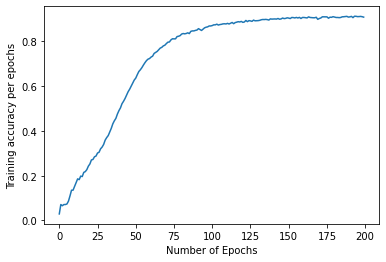

In [12]:
plt.plot(history.history['accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training accuracy per epochs')
plt.show()

In [29]:
seed_text = "some say"
next_words = 12
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


some say that he is not allowed by law within a hundred yards of
